<a href="https://colab.research.google.com/github/Zamoca42/TIL/blob/main/Stat/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from sklearn.datasets import load_boston # Scikit-LearnÏóêÏÑú Ï†úÍ≥µÌïòÎäî dataset package Ìò∏Ï∂ú
import pandas as pd                        # pandas package Ìò∏Ï∂ú (DataFrame ÌôúÏö©)

In [2]:
boston_houseprice_data = load_boston()   # BostonÏßÄÏó≠Ïùò Ï£ºÌÉùÍ∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÍ∏∞ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞ Î°úÎìú

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
# Í∞ÄÏ†∏Ïò® Îç∞Ïù¥ÌÑ∞ÏôÄ Î≥ÄÏàòÎ™ÖÎì§ÏùÑ ÌôúÏö©ÌïòÏó¨ DataFrame ÏÉùÏÑ±

df = pandas.DataFrame(
    data = boston_houseprice_data.data,
    columns = boston_houseprice_data.feature_names
)

In [4]:
# Ï¥àÍ∏∞ 5Í±¥Ïùò Îç∞Ïù¥ÌÑ∞Î•º Ï∂úÎ†•Ìï¥ÏÑú Í∞ÑÎã®Ìïú Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ ÌôïÏù∏
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [5]:
# AGE Ïª¨Îüº Î∂àÎü¨Ïò§Í∏∞
# Í≤∞Í≥ºÎäî SeriesÎùºÎäî 1Ï∞®Ïõê Íµ¨Ï°∞Î°ú Ï∂úÎ†•Îê®
df['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [6]:
df.shape
# Îç∞Ïù¥ÌÑ∞ Í∞úÏàò : 506Í∞ú (506Í∞ú Ìñâ)
# Î≥ÄÏàòÏùò Í∞úÏàò : 13Í∞ú (13Í∞ú Ïó¥)

(506, 13)

# 3. Î≥ÄÏàòÏùò Î∂ÑÎ•ò Í∏∞Ï§Ä

- ÏßàÏ†Å Î≥ÄÏàò / ÏñëÏ†Å Î≥ÄÏàò
  - ÏßàÏ†ÅÎ≥ÄÏàò(Qualitative variable)
    - Î≥ÄÏàòÏùò Í∞íÏù¥ ÌäπÏ†ï Î≤îÏ£ºÏóê Ìè¨Ìï®ÎêòÎèÑÎ°ù ÌëúÌòÑÍ∞ÄÎä•Ìïú Î≥ÄÏàò 
      - Ïòà) ÏïÑÏù¥Îì§ Ïû•ÎÇúÍ∞êÏùò ÏÉâÏÉÅ, ÌäπÏ†ï ÏßëÎã® Íµ¨ÏÑ±ÏõêÏùò ÏÑ±Î≥Ñ, Ï¢ÖÍµê Îì±
  - ÏñëÏ†ÅÎ≥ÄÏàò(Quantitative variable) 
    - Î≥ÄÏàòÏùò Í∞íÏùÑ Ïà´ÏûêÎ°ú ÎÇòÌÉÄÎÇº Ïàò ÏûàÎäî Î≥ÄÏàò 
      - Ïòà) ÏÇ¨ÎûåÏùò ÌÇ§ÎÇò Î™∏Î¨¥Í≤å, Ìïú Í∞ÄÏ†ïÏùò ÏÜåÎìù, Í≥†ÏÜçÎèÑÎ°ú ÌÜµÌñâÎüâ Îì±

- Ïù¥ÏÇ∞ Î≥ÄÏàò / Ïó∞ÏÜç Î≥ÄÏàò
  - Ïù¥ÏÇ∞ Î≥ÄÏàò(discrete variable)
    - ÏÖÄÏàò ÏûàÎäî Î≥ÄÏàò 
      - Ïòà) ÏïÑÌååÌä∏ÏùòÏ∏µÏàò,ÌïúÌöåÏÇ¨ÏùòÏßÅÏõêÏùòÏàò,Î∂àÎüâÌíàÏùòÍ∞úÏàòÎì±
  - Ïó∞ÏÜç Î≥ÄÏàò(continuous variable)
    - ÏÖÄÏàò ÏóÜÎäî Î≥ÄÏàò
    - Ïù¥ÏÇ∞ Î≥ÄÏàòÏôÄ Îã§Î•¥Í≤å Î≥ÄÏàòÏùò Í∞Å Í∞í ÏÇ¨Ïù¥Ïóê Î¨¥ÏàòÌûà ÎßéÏùÄ Îòê Îã§Î•∏ Í∞íÎì§Ïù¥ Ï°¥Ïû¨ÌïòÎäî ÌäπÏÑ±ÏùÑ Îùî
      - Ïòà) ÏÇ¨ÎûåÏùò ÌÇ§, Î™∏Î¨¥Í≤å, ÎÇòÏù¥, Ìïú Í∞ÄÍµ¨Ïùò ÏÜåÎìù Îì±

- Í∞ÑÍ≤© Î≥ÄÏàò / ÎπÑÏú® Î≥ÄÏàò ( Ïó∞ÏÜçÌòï Î≥ÄÏàò )
  - Í∞ÑÍ≤©Î≥ÄÏàò 
    - ÎåÄÏÜåÍ¥ÄÍ≥ÑÏôÄ Ìï®Íªò Í∑∏ Ï∞®Ïù¥ÏóêÎèÑ ÏùòÎØ∏Î•º ÎëêÎäî Î≥ÄÏàò 
      - Ïòà) Ïó∞ÎèÑ, Ïò®ÎèÑÎì±
  - ÎπÑÏú®Î≥ÄÏàò 
    - ÎåÄÏÜåÍ¥ÄÍ≥Ñ, Ï∞®Ïù¥, ÎπÑ Î™®ÎëêÏóê ÏùòÎØ∏Î•º ÎëêÎäî Î≥ÄÏàò 
      - Ïòà) Í∏∏Ïù¥, Î¨¥Í≤åÎì±

- Î™ÖÎ™© Î≥ÄÏàò / ÏàúÏúÑ Î≥ÄÏàò
  - Î™ÖÎ™©Î≥ÄÏàò 
    - Îã®ÏàúÌûà Î∂ÑÎ•òÌïòÍ∏∞ ÏúÑÌïú Î≥ÄÏàò 
      - Ïòà) ÌïôÏÉùÎ≤àÌò∏, Ï†ÑÌôîÎ≤àÌò∏, ÏÑ±Î≥Ñ Îì±
  - ÏàúÏúÑÎ≥ÄÏàò 
    - ÏàúÏÑúÍ¥ÄÍ≥Ñ Î∞è ÎåÄÏÜåÍ¥ÄÍ≥ÑÏóê ÏùòÎØ∏Î•º Îëî Î≥ÄÏàò 
      - Ïòà) ÏÑ±Ï†Å ÏàúÏúÑ, ÏÑ§Î¨∏Ï°∞ÏÇ¨Ïùò ÎßåÏ°±ÎèÑ Îì±

- Î≥ÄÏàò Î∂ÑÎ•òÏùò Ï§ëÏöîÏÑ±
  - Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞Îäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Pandas ÌôúÏö©Ïãú ÏâΩÍ≤å Ï∏°Ï†ïÏù¥ Í∞ÄÎä•
  - ÌïòÏßÄÎßå, Î≥ÄÏàòÏùò Î∂ÑÎ•òÎäî Î≥ÄÏàòÏùò ÏÑ±ÏßàÏùÑ ÌååÏïÖÌïòÎäî Î∂ÑÏÑùÍ∞ÄÎ°úÏÑúÏùò ÏßÄÏãùÏù¥ ÌïÑÏöî
    

# 1Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

- Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù
  - ÌèâÍ∑† ÌòπÏùÄ Î∂ÑÏÇ∞ Îì±Ïùò ÏàòÏπò ÏßÄÌëúÏóê Îî∞Îùº Îç∞Ïù¥ÌÑ∞Î•º ÏöîÏïΩ
  - Í∑∏Î¶ºÏùÑ Í∑∏Î†§ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¥Ìé¥Î≥¥Îäî Î∞©Î≤ï
  - ÌôúÏö©Ìï† Python Tool Package
    - Pandas: Îç∞Ïù¥ÌÑ∞ Í¥ÄÎ¶¨Ïóê Ïö©Ïù¥ 
    - Numpy: ÏàòÏπò Í≥ÑÏÇ∞Ïóê ÌäπÌôî

- ÏàòÏπò ÌëúÌòÑ Í∑úÏπô
  - ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Í≤∞Í≥º ÌååÏïÖÏùÑ ÏàòÏõîÌïòÍ≤å ÌïòÍ∏∞ÏúÑÌï¥ ÏÜåÏàòÏ†ê 3ÏûêÎ¶¨ÍπåÏßÄÎßå, Ïú†Ìö®Ïà´Ïûê ÌëúÌòÑÏùÑ Ï†úÌïú



In [10]:
# ColabÏùò Ï∂úÎ†•ÏùÑ ÏÜåÏàòÏ†ê Ïù¥Ìïò 3ÏûêÎ¶¨Î°ú Ï†úÌïú
%precision 3

# pandas DataFrameÏùò Ï∂úÎ†•ÏùÑ ÏÜåÏàòÏ†ê Ïù¥Ìïò 3ÏûêÎ¶¨Î°ú Ï†úÌïú
pd.set_option('precision', 3)

# 1. ÎåÄÌëúÍ∞í ‚Äí ÌèâÍ∑†Í∞í, Ï§ëÏïôÍ∞í, ÏµúÎπàÍ∞í

- ÎåÄÌëúÍ∞íÏù¥ÎûÄ?
  - Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞Î•º ÎåÄÌëúÌïòÎäî ÌäπÏ†ï Í∞í
  - Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÏùò Í∞íÏúºÎ°ú ÏöîÏïΩÌïú ÏßÄÌëú
  - Ïòà) ÌèâÍ∑†Í∞í, Ï§ëÏïôÍ∞í, ÏµúÎπàÍ∞í Îì±
  - Ï¶â,ÌïôÏ∞ΩÏãúÏ†à Ïñ¥Îñ§ ÏãúÌóòÏùò ÎÇúÏù¥ÎèÑÎ•º ÏïåÍ≥† Ïã∂Îã§ÎùºÍ≥† Ìï† Îïå,
  Ï†ÑÏ≤¥ ÌïôÏÉùÏùò ÏãúÌóò Ï†êÏàòÎ•º ÏïåÍ≥† ÏûàÏßÄ Î™ªÌï¥ÎèÑ, 
  ÌèâÍ∑† Ï†êÏàòÍ∞Ä ÎÜíÏùÄÏßÄ ÎÇÆÏùÄÏßÄ Ïó¨Î∂ÄÏóê Îî∞Îùº ÏãúÌóòÏùò ÎÇúÏù¥ÎèÑÎ•º ÌååÏïÖÌï† Ïàò ÏûàÎã§.

- ÌèâÍ∑†Í∞í (Mean / Average)
  - Í∞ÄÏû• Ïûò ÏïåÎ†§ÏßÑ ÎåÄÌëúÍ∞í / Í≥ÑÏÇ∞Î∞©Î≤ïÏù¥ Í∞ÑÎã® 
  - ÏùºÏÉÅÏÉùÌôúÏóêÏÑúÎèÑ Í∞ÄÏû• ÎßéÏù¥ Ïì∞ÏûÑ
  - Í≥ÑÏÇ∞Î∞©Î≤ï
    - Îç∞Ïù¥ÌÑ∞Ïùò Í∞íÏùÑ Î™®Îëê ÎçîÌïú Îí§,Îç∞Ïù¥ÌÑ∞Ïùò Í∞ØÏàòÎ°ú ÎÇòÎàÑÏñ¥ÏÑú Í≥ÑÏÇ∞ 
  - Í≥ÑÏÇ∞ÏòàÏãú

    ![·Ñâ·Ö≥·Ñè·Ö≥·ÑÖ·Öµ·Ü´·Ñâ·Ö£·Ü∫ 2022-12-03 ·Ñã·Ö©·Ñí·ÖÆ 11 53 56](https://user-images.githubusercontent.com/96982072/205447109-89ef0e9c-8d6e-44f8-beae-5f0842160c00.png)

    


- ÌèâÍ∑†Í∞í (Mean / Average) Í≥ÑÏÇ∞ Î∞©Î≤ï

- Í≥µÏãù
  - $ \bar{X} = { \sum_{i=1}^n X_i \over n} $
  - $ X_i $ : iÎ≤àÏß∏ Í∞úÏ≤¥Ïùò Ï∏°Ï†ïÍ∞í
  - $ \bar{X} $ : ÏßëÎã®Ïùò ÌèâÍ∑†

In [13]:
# ÌèâÍ∑†Í∞í Pandas Í≥ÑÏÇ∞

sum(df['AGE']) / len(df['AGE'])

68.57490118577076

In [ ]:
# ÌèâÍ∑†Í∞í Pandas Í≥ÑÏÇ∞2

df['AGE'].mean()

In [14]:
# ÌèâÍ∑†Í∞í numpy Í≥ÑÏÇ∞

import numpy as np

np.mean(df['AGE'])

68.57490118577076

- Ï§ëÏïôÍ∞í (Median)
   - Îç∞Ïù¥ÌÑ∞Î•º ÌÅ¨Í∏∞ ÏàúÏÑúÎåÄÎ°ú ÎÇòÏó¥ÌïòÏòÄÏùÑ Îïå, Ï†ïÌôïÌïòÍ≤å Ï§ëÏïôÏóê ÏúÑÏπòÌïú Í∞í 
   - Í≥ÑÏÇ∞ÏòàÏãú
    - [9,1,3,5,7]Ïù¥ÎùºÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏùÑ Îïå,
Îç∞Ïù¥ÌÑ∞Î•º ÌÅ¨Í∏∞ ÏàúÏÑúÎåÄÎ°ú ÎÇòÏó¥([9,1,3,5,7] -> [1,3,5,7,9]) ÌõÑ Ï§ëÍ∞ÑÏù∏ 5Í∞Ä Ï§ëÏïôÍ∞íÏù¥ Îê®

- Ï§ëÏïôÍ∞íÏùò ÌäπÏßï
  - Îç∞Ïù¥ÌÑ∞Ïùò Ïù¥ÏÉÅÍ∞íÏù¥ Ï°¥Ïû¨Ìï† Îïå, ÌèâÍ∑†Í∞íÎ≥¥Îã§ ÎåÄÌëúÍ∞íÏùÑ Ïûò ÌëúÌòÑÌï¥ÎÇ∏Îã§.
Ï¶â, Ïù¥ÏÉÅÍ∞íÏùò ÏòÅÌñ•ÏùÑ Îçú Î∞õÎäîÎã§. 
  - Í≥ÑÏÇ∞ÏòàÏãú
    - [1,2,3,4,5,6,1000]Ïù¥ÎùºÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏùÑ Îïå,  
      Ï¶â, Ïù¥ÏÉÅÏπò Í∞íÏù¥ Ï°¥Ïû¨Ìï† Îïå ÌèâÍ∑†Í∞íÏù∏ 150Ïù¥ÎùºÎäî ÏàòÏπòÎäî 
      1,2,3,4,5,6,1000 Í∑∏ Ïñ¥Îñ§ Í∞íÎèÑ ÎπÑÏä∑ÌïòÍ≤å ÌëúÌòÑÌïòÏßÄ Î™ªÌïúÎã§.   
      ÌèâÍ∑†Í∞íÏùÄ ÏïΩ 150Ïù¥ ÎÇòÏò§ÏßÄÎßå, Ï§ëÏïôÍ∞íÏùÄ 4Î°úÏÑú ÌëúÌòÑÎêòÎ©∞, Ïù¥ÏÉÅÏπòÎ•º Ï†úÏô∏Ìïú Îç∞Ïù¥ÌÑ∞Îì§Ïùò Î∂ÑÌè¨Î•º ÌèâÍ∑†Í∞í Î≥¥Îã§ Îçî Ïûò ÌëúÌòÑÎê®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

- Ï§ëÏïôÍ∞í (Median) Í≥ÑÏÇ∞ Î∞©Î≤ï
  - Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò nÏù¥ ÌôÄÏàòÎùºÎ©¥, ${(n+1) \over 2}$ Î≤àÏß∏ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï§ëÏïôÍ∞í

  - Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò nÏù¥ ÏßùÏàòÎùºÎ©¥, $ n \over 2 $ Î≤àÏß∏ Îç∞Ïù¥ÌÑ∞ÏôÄ $ {n \over 2} + 1 $ Î≤àÏß∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑†Ïù¥ Ï§ëÏïôÍ∞í

  - Í≥ÑÏÇ∞ÏòàÏãú
    - [1,2,3,4,5] -> Îç∞Ïù¥ÌÑ∞ 5Í∞ú -> 3Î≤àÏß∏Ïù∏ 3Ïù¥ Ï§ëÏïôÍ∞í
    - [1,2,3,4,5,6] -> Îç∞Ïù¥ÌÑ∞ 6Í∞ú -> 3Î≤àÏß∏ Îç∞Ïù¥ÌÑ∞(3)ÏôÄ 4Î≤àÏß∏ Îç∞Ïù¥ÌÑ∞(4)Ïùò ÌèâÍ∑†Ïù∏ ${3 + 4 \over 2} = 3.5$ Í∞Ä Ï§ëÏïôÍ∞í

In [15]:
# Ï§ëÏïôÍ∞í Í≥ÑÏÇ∞ Î∞©Î≤ï

# len Í≥ÑÏÇ∞
len(df['AGE']) # 506

# 253Î≤àÏß∏, 254Î≤àÏß∏ Í∞í
print(
    list(df['AGE'].sort_values())[int(len(df['AGE'])/2 -1)], 
    list(df['AGE'].sort_values())[int(len(df['AGE'])/2)]
)
# Ï§ëÏïôÍ∞í Í≥ÑÏÇ∞ : 253Î≤àÏß∏ Í∞íÍ≥º 254Î≤àÏß∏ Í∞íÏùò ÌèâÍ∑†Í∞í
print(
    (
        list(df['AGE'].sort_values())[int(len(df['AGE'])/2 -1)] +
        list(df['AGE'].sort_values())[int(len(df['AGE'])/2)]
    ) / 2
)

77.3 77.7
77.5


In [16]:
# Ï§ëÏïôÍ∞í pandas Í≥ÑÏÇ∞ Î∞©Î≤ï

df['AGE'].median()

77.5

In [17]:
# Ï§ëÏïôÍ∞í numpy Í≥ÑÏÇ∞ Î∞©Î≤ï

np.median(df['AGE'])

77.5

- ÏµúÎπàÍ∞í (Mode)
  - Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í∞ÄÏû• ÎßéÏù¥ ÎÇòÌÉÄÎÇòÎäî Í∞í
  - Ï£ºÎ°ú, Î≤îÏ£ºÌòï Î≥ÄÏàò(ÏßàÏ†Å Î≥ÄÏàò)Ïùò ÎåÄÌëúÍ∞íÏùÑ Íµ¨Ìï† Îïå ÏÇ¨Ïö©Îê®
   (Ï†êÏàòÏôÄ Í∞ôÏùÄ ÏàòÏπòÌòï Î≥ÄÏàòÎäî, ÎèôÏùºÌïú Ï†êÏàòÍ∞Ä Ïó¨Îü¨Î≤à Î∞òÎ≥µÎêòÎäî Í≤ΩÏö∞Í∞Ä Í±∞Ïùò ÎìúÎ¨ºÍ∏∞ ÎïåÎ¨∏)
- Í≥ÑÏÇ∞ÏòàÏãú
  - [1,1,1,2,2,3]Ïù¥ÎùºÎäî Îç∞Ïù¥ÌÑ∞ Ï°¥Ïû¨Ïãú, 1Ïù¥ Í∞ÄÏû• ÎßéÏù¥ ÎÇòÌÉÄÎÇòÎØÄÎ°ú
ÏµúÎπàÍ∞íÏùÄ 1Ïù¥ ÎêúÎã§.

In [18]:
# ÏµúÎπàÍ∞í Pandas Í≥ÑÏÇ∞ Î∞©Î≤ï

df['AGE'].mode()

0    100.0
dtype: float64

In [19]:
# ÏµúÎπàÍ∞í numpy Í≥ÑÏÇ∞ Î∞©Î≤ï

np.mode(df['AGE'])

# numpyÎäî Í≥ÑÏÇ∞Î∂àÍ∞Ä

AttributeError: ignored

# 2. ÏÇ∞Ìè¨ÎèÑ ‚Äí Î∂ÑÏÇ∞, ÌëúÏ§ÄÌé∏Ï∞®, ÏÇ¨Î∂ÑÏúÑ

- ÏÇ∞Ìè¨ÎèÑ
  - ÎåÄÌëúÍ∞íÏùÑ Ï§ëÏã¨ÏúºÎ°ú ÏûêÎ£åÎì§Ïù¥ Ìù©Ïñ¥Ï†∏ ÏûàÎäî Ï†ïÎèÑ  
  (Ï¶â, ÎåÄÌëúÍ∞íÏù¥ Í∞ôÎçîÎùºÎèÑ ÏÇ∞Ìè¨ÎèÑÏóê Îî∞Îùº Îç∞Ïù¥ÌÑ∞Îäî Îã§Î•∏ ÌäπÏÑ±ÏùÑ   Í∞ÄÏßÑÎã§.)
  - ÌïòÎÇòÏùò ÏàòÏπòÎ°úÏÑú ÌëúÌòÑÎêúÎã§.
    - ÏàòÏπòÍ∞Ä ÏûëÏùÑÏàòÎ°ù ÏûêÎ£åÎì§Ïù¥ ÎåÄÌëúÍ∞íÏóê Î∞ÄÏßë
    - ÏàòÏπòÍ∞Ä ÌÅ¥ÏàòÎ°ù ÏûêÎ£åÎì§Ïù¥ ÎåÄÌëúÍ∞íÏùÑ Ï§ëÏã¨ÏúºÎ°ú Î©ÄÎ¶¨ Ìù©Ïñ¥Ï†∏ ÏûàÎã§
  - ÏÇ∞Ìè¨ÎèÑÎ•º ÎåÄÌëúÌïòÎäî Í∞íÎì§ : Î∂ÑÏÇ∞, ÌëúÏ§ÄÌé∏Ï∞®, ÏÇ¨Î∂ÑÏúÑ

- Ìé∏Ï∞®
  - ÏÇ∞Ìè¨ÎèÑÎ•º Íµ¨ÌïòÎäî Ï≤´Í±∏Ïùå
  - Í∞Å Îç∞Ïù¥ÌÑ∞Í∞Ä ÌèâÍ∑†ÏúºÎ°úÎ∂ÄÌÑ∞ Ïñ¥Îäê Ï†ïÎèÑ Îñ®Ïñ¥Ï†∏ ÏûàÎäîÏßÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÏßÄÌëú 
  - Í≥ÑÏÇ∞ÏòàÏãú
    - A ÌïôÏÉùÏùò Ï†êÏàòÏù¥ 42Ï†ê, 10Î™ÖÏùò ÌèâÍ∑† Ï†êÏàòÍ∞Ä 55Ï†êÏù¥ÎùºÎ©¥, A ÌïôÏÉùÏùò Ìé∏Ï∞®Îäî 42-55Î°ú -13Ï†êÏù¥ ÎêúÎã§.

In [22]:
# Ìé∏Ï∞®

# Îç∞Ïù¥ÌÑ∞ a
score_a = [42, 69, 56, 41, 57, 48, 65, 49, 65, 58]
df_score_a = pd.DataFrame(score_a)
print(df_score_a)

# aÏùò Ìé∏Ï∞®
print(df_score_a - df_score_a.mean())

    0
0  42
1  69
2  56
3  41
4  57
5  48
6  65
7  49
8  65
9  58
      0
0 -13.0
1  14.0
2   1.0
3 -14.0
4   2.0
5  -7.0
6  10.0
7  -6.0
8  10.0
9   3.0


In [23]:
# Îç∞Ïù¥ÌÑ∞ b

score_b = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
df_score_b = pd.DataFrame(score_b)
print(df_score_b)

# bÏùò Ìé∏Ï∞®
print(df_score_b - df_score_b.mean())

    0
0  50
1  60
2  58
3  54
4  51
5  56
6  57
7  53
8  52
9  59
     0
0 -5.0
1  5.0
2  3.0
3 -1.0
4 -4.0
5  1.0
6  2.0
7 -2.0
8 -3.0
9  4.0


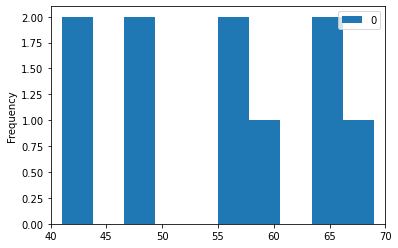

In [24]:
# Í∏∞Ï¥à Îç∞Ïù¥ÌÑ∞ aÏùò Î∂ÑÌè¨
df_score_a.plot.hist(xlim=[40,70])

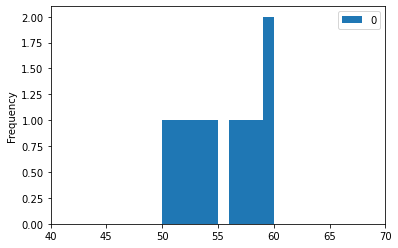

In [25]:
# Í∏∞Ï¥à Îç∞Ïù¥ÌÑ∞ bÏùò Î∂ÑÌè¨
df_score_b.plot.hist(xlim=[40,70])

- Ìé∏Ï∞®Ïùò Í∞íÏùò ÌèâÍ∑†ÏùÑ Íµ¨Ìï¥Î≥¥Î©¥?
  - Ìé∏Ï∞® Í∞íÎì§Ïùò ÌèâÍ∑†ÏùÄ 0

    ![·Ñâ·Ö≥·Ñè·Ö≥·ÑÖ·Öµ·Ü´·Ñâ·Ö£·Ü∫ 2022-12-04 ·Ñã·Ö©·Ñí·ÖÆ 11 24 33](https://user-images.githubusercontent.com/96982072/205496279-cae7b3ec-8c1b-4e30-8085-3caf357c1d7d.png)


- Ï¶â, Ìé∏Ï∞® ÌèâÍ∑†ÏúºÎ°úÎäî ÏÇ∞Ìè¨ÎèÑÎ•º Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÎã§!
  - Î∂ÑÏÇ∞ÏùÑ ÌôúÏö©Ìï¥Î≥¥Ïûê.

- Î∂ÑÏÇ∞
  - Ìé∏Ï∞®Ïùò Ï†úÍ≥±ÏùÑ Ìï©ÏÇ∞ÌïòÏó¨ ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìïú Í∞í
    - Ìé∏Ï∞®Ïùò Ï†àÎåÄÍ∞íÏùÑ Ìï©ÏÇ∞ÌïòÏó¨ ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞ÌïòÎäî Î∞©Î≤ïÎèÑ ÏûàÏúºÎÇò, Í±∞Ïùò ÌôúÏö©ÎêòÏßÄ ÏïäÎäîÎã§.
  - Ìé∏Ï∞®Ïùò ÌèâÍ∑†ÏùÄ Ìï≠ÏÉÅ 0Ïù¥ ÎêòÎäî Î¨∏Ï†úÎ•º Í≥†Î†§ÌïòÏòÄÎã§.

    ![·Ñâ·Ö≥·Ñè·Ö≥·ÑÖ·Öµ·Ü´·Ñâ·Ö£·Ü∫ 2022-12-04 ·Ñã·Ö©·Ñí·ÖÆ 11 29 10](https://user-images.githubusercontent.com/96982072/205496478-7c22a83e-d631-4b56-87a5-233702ae1d39.png)

In [28]:
# Î∂ÑÏÇ∞ Í≥ÑÏÇ∞ Î∞©Î≤ï

# Pandas - var()

print(df_score_a.var())

print(df_score_b.var())

# numpy - np.var()

print(np.var(df_score_a))

print(np.var(df_score_b))

0    95.556
dtype: float64
0    12.222
dtype: float64
0    86.0
dtype: float64
0    11.0
dtype: float64


- Î∂ÑÏÇ∞ Í≥ÑÏÇ∞ Î∞©Î≤ï
  - Pandas ( a: 95.556, b: 12.222, a‚Äô: 86, b‚Äô:11 )
    * PandasÏóêÏÑú Í∏∞Î≥∏ var() Ìï®ÏàòÎ°ú Í≥ÑÏÇ∞Îêú Î∂ÑÏÇ∞ Í∞íÏùÄ NumpyÏóêÏÑú. Í≥ÑÏÇ∞Îêú Î∂ÑÏÇ∞ Í∞íÍ≥ºÎäî Í∞íÏù¥ Îã§Î•¥Îã§. PandasÏùò Var() Ìï®Ïàò Í≤∞Í≥ºÍ∞íÏùÄ. ÌëúÎ≥∏Î∂ÑÏÇ∞Ïù¥ ÏïÑÎãå Î∂àÌé∏Î∂ÑÏÇ∞Ïù¥Î©∞, ÏïûÏóêÏÑú ÏïåÎ†§Ï§Ä Í∏∞Ï°¥ Î∂ÑÏÇ∞Ïùò. Í∞úÎÖêÍ≥ºÎäî Îã§Î•∏ Ïñ¥Î†§Ïö¥ Í∞úÎÖêÏúºÎ°ú Ï∂îÌõÑ Ch.10ÏóêÏÑú Îã§Î£∞ ÏòàÏ†ïÏù¥Îã§.
    * ÎèôÏùºÌïòÍ≤å Í≥ÑÏÇ∞Îêú Í≤∞Í≥ºÍ∞íÏùÑ ÏñªÍ≥† Ïã∂ÏùÑ ÎïåÎäî, default Í∞íÏúºÎ°ú Ï°¥Ïû¨ÌïòÎçò ddof=1Ïù¥ ÏïÑÎãå ddof=0Î•º ÏßÅÏ†ë ÏûÖÎ†•ÌïòÎ©¥ ÎèôÏùºÌïú Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
  - Numpy(a:86,b:11)
    * Í∏∞Î≥∏ ÌëúÎ≥∏Î∂ÑÏÇ∞Ïùò Í∞úÎÖêÏúºÎ°ú Í≤∞Í≥ºÍ∞íÏùÑ ÏñªÏùÑ Ïàò ÏûàÎã§.
  
- ÌëúÏ§ÄÌé∏Ï∞®
  - ÌèâÍ∑†Ïùò Îã®ÏúÑÎäî ÏõêÎûòÏùò Îç∞Ïù¥ÌÑ∞ Îã®ÏúÑÏôÄ Îã§Î•¥ÏßÄ ÏïäÏßÄÎßå,  
  Î∂ÑÏÇ∞Ïùò Îã®ÏúÑÎäî Ï†êÏàòÏùò Ï†úÍ≥±ÏúºÎ°ú ÌëúÌòÑÎêúÎã§Îäî Ï†êÏóêÏÑú Ïù¥Ìï¥ÌïòÍ∏∞ Ïñ¥Î†§Ïö¥ Îã®ÏúÑÏù¥Îã§. ( $86Ï†ê^2$ ?! )
  - Îî∞ÎùºÏÑú, Î∂ÑÏÇ∞Ïóê Ï†úÍ≥±Í∑ºÏùÑ Ï∑®ÌïòÏó¨, ÏõêÎûòÏùò Îç∞Ïù¥ÌÑ∞ÏôÄ ÎèôÏùºÌïú Îã®ÏúÑÎ•º Ïì∞ÎèÑÎ°ù ÎßåÎì§Ïñ¥ÏßÑ ÏÇ∞Ìè¨ÎèÑÏùò ÏßÄÌëúÎ•º
ÌëúÏ§ÄÌé∏Ï∞®ÎùºÍ≥† ÌïúÎã§.  
  ![·Ñâ·Ö≥·Ñè·Ö≥·ÑÖ·Öµ·Ü´·Ñâ·Ö£·Ü∫ 2022-12-04 ·Ñã·Ö©·Ñí·ÖÆ 11 33 59](https://user-images.githubusercontent.com/96982072/205496710-f18c297b-b3b6-45ac-8f62-0f610d1424e9.png)

- ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞ Î∞©Î≤ï

  - Pandas
    * std()Ìï®ÏàòÏóê ddof=0ÏùÑ ÎÑ£Ïñ¥ÏÑú ÌôïÏù∏ Í∞ÄÎä•
  
  - Numpy
    * sqrt() Ï†úÍ≥±Í∑º Ìï®ÏàòÎ•º Î∂ÑÏÇ∞Í∞íÏóê Ï†ÅÏö©ÌïòÎäî Î∞©Î≤ï
    * std() Ìï®ÏàòÎ•º Í∑∏ÎåÄÎ°ú ÌôúÏö©ÌïòÎäî Î∞©Î≤ï

In [31]:
# ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞ Î∞©Î≤ï

# pandas

print(df_score_a.std(ddof=0))
print('-'*30)
print(df_score_b.std(ddof=0))
print('-'*30)

# numpy

print(np.sqrt(np.var(df_score_a)))
print('-'*30)
print(np.sqrt(np.var(df_score_b)))

0    9.274
dtype: float64
------------------------------
0    3.317
dtype: float64
------------------------------
0    9.274
dtype: float64
------------------------------
0    3.317
dtype: float64


- Î≤îÏúÑÏôÄ ÏÇ¨Î∂ÑÏúÑ Î≤îÏúÑ
  - Î≤îÏúÑ (Range)
    - Îç∞Ïù¥ÌÑ∞Ïùò ÏµúÎåÄÍ∞íÍ≥º ÏµúÏÜåÍ∞íÎßåÏúºÎ°ú ÏÇ∞Ìè¨ÎèÑÎ•º ÌëúÌòÑÌïòÎäî Î∞©Î≤ï 
    - Î∂ÑÏÇ∞ ÌòπÏùÄ ÌëúÏ§ÄÌé∏Ï∞®ÏôÄÎäî Îã¨Î¶¨,Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤¥Î•º Îã¥ÏùÄ ÌëúÌòÑ Î∞©ÏãùÏù¥ ÏïÑÎãàÎã§
    - Ï¶â, ÏµúÎåÄÍ∞í-ÏµúÏÜåÍ∞íÏùò Ï∞®Ïù¥Í∞Ä ÌÅ¨Î©¥ ÏÇ∞Ìè¨ÎèÑÍ∞Ä ÌÅ¨Í≥†, Ï∞®Ïù¥Í∞Ä ÏûëÏúºÎ©¥ ÏÇ∞Ìè¨ÎèÑÍ∞Ä ÏûëÎã§Îäî Í≤ÉÏúºÎ°ú ÌëúÌòÑÎêúÎã§. 
    - Í∞íÏùÑ 2Í∞úÎßå ÌôúÏö©ÌïòÍ∏∞Ïóê, Í∞úÎûµÏ†ÅÏù∏ ÏßÄÌëúÏù¥Î©∞, Ïù¥ÏÉÅÍ∞íÏùÑ Î∞òÏòÅÌïòÎäî Îç∞ ÏûàÏñ¥ÏÑú ÏàòÏ§ÄÏù¥ ÎÇÆÏùÄ ÏßÄÌëúÏù¥Îã§.

In [32]:
# Î≤îÏúÑÏùòÍ≥ÑÏÇ∞Î∞©Î≤ï

# pandas

print(df_score_a.max() - df_score_a.min())

print('-'*30)

# numpy

print(np.max(df_score_a) - np.min(df_score_a))

0    28
dtype: int64
------------------------------
0    28
dtype: int64


- Î≤îÏúÑÏôÄ ÏÇ¨Î∂ÑÏúÑ Î≤îÏúÑ
  - ÏÇ¨Î∂ÑÏúÑ Î≤îÏúÑ (interquartile range)
    - Îç∞Ïù¥ÌÑ∞Ïùò ÌïòÏúÑ 25%(Q1:Ï†ú1ÏÇ¨Î∂ÑÏúÑÏàò), 50%(Q2:Ï†ú2ÏÇ¨Î∂ÑÏúÑÏàò), 75%(Q3:Ï†ú3ÏÇ¨Î∂ÑÏúÑÏàò)Ïóê ÏúÑÏπòÌïòÎäî Í∞íÏúºÎ°ú ÌëúÌòÑÎêú Î≤îÏúÑ
    - Q3‚ÄíQ1ÏùÑ ÏÇ¨Î∂ÑÏúÑ Î≤îÏúÑ IQRÎ°ú Ï†ïÏùòÌïúÎã§. 
  - ÏÇ¨Î∂ÑÏúÑ Î≤îÏúÑÏùò ÌäπÏßï
    - Î≤îÏúÑÎùºÎäî Í∞íÏùÄ ÏµúÎåÄÍ∞í ÏµúÏÜåÍ∞íÎßåÏùÑ ÌôúÏö©ÌïòÍ≥† ÏûàÏñ¥ÏÑú Ïù¥ÏÉÅÍ∞íÏùÑ Î∞òÏòÅÌïú ÏÇ∞Ìè¨ÎèÑÎ•º ÌëúÌòÑÌïòÎäî Í≤ÉÏù¥ Ïñ¥Î†µÏßÄÎßå, ÏÇ¨Î∂ÑÏúÑ Î≤îÏúÑÎäî Ïù¥ÏÉÅÍ∞íÏùÑ Î∞òÏòÅÌïú ÏÇ∞Ìè¨ÎèÑÎ•º ÌëúÌòÑÌïòÎäî Í≤ÉÏóê ÎçîÏö± Ìö®Í≥ºÏ†ÅÏù¥Îã§.
    - Î∂ÑÏÇ∞Í≥º ÌëúÏ§ÄÌé∏Ï∞®Îäî ÌèâÍ∑†Í∞íÏóê ÎåÄÌï¥ Ï†ïÏùòÎêòÎäî ÏÇ∞Ìè¨ÎèÑ ÏßÄÌëúÏù∏ Î∞òÎ©¥, ÏÇ¨Î∂ÑÏúÑ Î≤îÏúÑÎäî Ï§ëÏïôÍ∞íÏóê ÎåÄÌï¥ Ï†ïÏùòÎêòÎäî ÏÇ∞Ìè¨ÎèÑ ÏßÄÌëúÏù¥Îã§.  
  (* IQR Í≥ÑÏÇ∞Ïãú, Q2Î•º ÏÇ¨Ïö©ÌïòÏßÄÎäî ÏïäÏßÄÎßå Q2Ïùò Í∞úÎÖêÏùÄ Ï§ëÏïôÍ∞íÍ≥º ÏùºÏπò)

In [33]:
# ÏÇ¨Î∂ÑÏúÑ Î≤îÏúÑ Í≥ÑÏÇ∞ Î∞©Î≤ï

# pandas Q3 - Q1

print(df_score_a.quantile(q=0.75) - df_score_a.quantile(q=0.25))

print('-'*30)
# numpy Q3 - Q1

print(np.percentile(df_score_a, 75) - np.percentile(df_score_a, 25))

0    15.0
dtype: float64
------------------------------
15.0


- Îç∞Ïù¥ÌÑ∞Ïùò ÎåÄÌëúÍ∞í / ÏÇ∞Ìè¨ÎèÑ Ìïú Î≤àÏóê ÌôïÏù∏ÌïòÎäî Î∞©Î≤ï
  - PandasÏùò Describe() Ìï®Ïàò
    - Îç∞Ïù¥ÌÑ∞ÏùòÏàò 
    - ÌèâÍ∑†/ÌëúÏ§ÄÌé∏Ï∞®
    - ÏµúÏÜåÍ∞í, Q1, Q2, Q3, ÏµúÎåÄÍ∞í

In [34]:
df_score_a.describe()

0
count  10.000
mean   55.000
std     9.775
min    41.000
25%    48.250
50%    56.500
75%    63.250
max    69.000

# 3. Ï†ïÍ∑úÌôî ‚Äí ÌëúÏ§ÄÌôî, Ìé∏Ï∞ªÍ∞í

- Ï†ïÍ∑úÌôîÍ∞Ä ÌïÑÏöîÌïòÎã§Í≥†?
  - ÏãúÌóòÏ†êÏàòÍ∞Ä 60Ï†êÏùº Îïå, ÌèâÍ∑†Ï†êÏàòÍ∞Ä 30Ï†êÏù¥ÎùºÎ©¥?  
  ÏãúÌóòÏ†êÏàòÍ∞Ä 60Ï†êÏùº Îïå, ÌèâÍ∑†Ï†êÏàòÍ∞Ä 90Ï†êÏù¥ÎùºÎ©¥?  
  ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞Ïù¥ Îã§Î•∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ÏóêÏÑú Ïñ¥ÎñªÍ≤å ÏÉÅÎåÄÏ†ÅÏù∏ ÏàòÏ§ÄÏùÑ ÌååÏïÖÌï† Ïàò ÏûàÏùÑÍπå?   
  Ï†ïÎãµÏùÄ? Ï†ïÍ∑úÌôî(Normalization) !

- Ï†ïÍ∑úÌôî (Normalization)
  - Îç∞Ïù¥ÌÑ∞Î•º ÌÜµÏùºÎêú ÏßÄÌëúÎ°ú Î≥ÄÌôòÌïòÎäî Í≤É
  - ÎåÄÌëúÏ†ÅÏúºÎ°ú, ÌëúÏ§ÄÌôîÏôÄ Ìé∏Ï∞®Í∞íÏù¥ ÌôúÏö©Îê®

- ÌëúÏ§ÄÌôî (Standardization)
  - Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌèâÍ∑†ÏùÑ ÎπºÍ≥†, ÌëúÏ§ÄÌé∏Ï∞®Î°ú ÎÇòÎàÑÎäî ÏûëÏóÖ
  - ÌëúÏ§ÄÌôîÎêú Îç∞Ïù¥ÌÑ∞Îäî ÌëúÏ§ÄÌôî Î≥ÄÎüâ(Standardized Data) ÌòπÏùÄ Z Ï†êÏàò(z-score)Î°ú Î∂àÎ¶º
  - Í∞Å Îç∞Ïù¥ÌÑ∞ $ ùë•_i $Î•º ÌëúÏ§ÄÌôîÌïú $ ùëß_i $ Î•º ÏàòÏãùÏúºÎ°ú ÎÇòÌÉÄÎÇ¥Î©¥ ÏïÑÎûòÏôÄ Í∞ôÎã§.  
  $z_i = {x_i - \bar{x} \over S} $



In [37]:
# ÌëúÏ§ÄÌôî Î≥ÄÌôò Î∞©Î≤ï

# Pandas

print((df_score_a - df_score_a.mean()) / df_score_a.std(ddof=0))

print('-'*30)

# numpy

print((df_score_a - np.mean(df_score_a)) / np.std(df_score_a))

       0
0 -1.402
1  1.510
2  0.108
3 -1.510
4  0.216
5 -0.755
6  1.078
7 -0.647
8  1.078
9  0.323
------------------------------
       0
0 -1.402
1  1.510
2  0.108
3 -1.510
4  0.216
5 -0.755
6  1.078
7 -0.647
8  1.078
9  0.323


- ÌëúÏ§ÄÌôî Î≥ÄÌôò Ïù¥ÌõÑ ÌèâÍ∑†, ÌëúÏ§ÄÌé∏Ï∞® Ï∏°Ï†ï
  - Pandas
    - ÌèâÍ∑†ÏùÄ ÏïΩ0, ÌëúÏ§ÄÌé∏Ï∞®Îäî ÏïΩ 1Î°ú Î≥ÄÍ≤Ω
  - Numpy
    - ÌèâÍ∑†ÏùÄ ÏïΩ0, ÌëúÏ§ÄÌé∏Ï∞®Îäî ÏïΩ 1Î°ú Î≥ÄÍ≤Ω


In [38]:
# ÌëúÏ§ÄÌôî

z = (
    df_score_a - df_score_a.mean()
) / df_score_a.std(ddof=0)

z2 = (
    df_score_a - np.mean(df_score_a)
) / np.std(df_score_a)

# Pandas

print(z.mean())
print('-'*30)
print(z.std(ddof=0))
print('-'*30)

# Numpy

print(np.mean(z))
print('-'*30)
print(np.std(z))

0   -1.665e-17
dtype: float64
------------------------------
0    1.0
dtype: float64
------------------------------
0   -1.665e-17
dtype: float64
------------------------------
0    1.0
dtype: float64


- Ìé∏Ï∞®Í∞í
  - ÌèâÍ∑†Ïù¥ 50, ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 10Ïù¥ ÎêòÎèÑÎ°ù Ï†ïÍ∑úÌôîÌïú Í∞í
  - ÏàòÏãùÏúºÎ°ú ÎÇòÌÉÄÎÇ¥Î©¥ ÏïÑÎûòÏôÄ Í∞ôÎã§.  
  $ z_i = 50 + 10 \times {x_i - \bar{x} \over S} 

In [39]:
# Ìé∏Ï∞®Í∞í Î≥ÄÌôò Î∞©Î≤ï

# Pandas

print(
50 + 10 * (
    df_score_a - df_score_a.mean()
) / df_score_a.std(ddof=0)
)
print('-'*30)

# Numpy

z_std = 50 + 10 * (
    df_score_a - np.mean(df_score_a)
) / np.std(df_score_a)
print(z_std)

        0
0  35.982
1  65.097
2  51.078
3  34.903
4  52.157
5  42.452
6  60.783
7  43.530
8  60.783
9  53.235
------------------------------
        0
0  35.982
1  65.097
2  51.078
3  34.903
4  52.157
5  42.452
6  60.783
7  43.530
8  60.783
9  53.235


- Ï†êÏàòÏôÄ Ìé∏Ï∞®Í∞í ÎπÑÍµê
  - Ï¢åÏ∏°: Ïã§Ï†ú Ï†êÏàòÍ∞í, Ïö∞Ï∏°: Ìé∏Ï∞®Í∞í
  - Ìé∏Ï∞®Í∞íÏù¥ÎûÄ ÏßÄÌëúÎ•º ÌÜµÌï¥.  
  Ïñ¥Îñ§ ÌïôÏÉùÏù¥ ÌèâÍ∑†Ï†ÅÏù∏ ÏÑ±Ï†ÅÏùÑ ÏñªÏóàÍ≥†, Ïñ¥Îñ§ ÌïôÏÉùÏù¥ Ïö∞ÏàòÌïú ÏÑ±Ï†ÅÏùÑ ÏñªÏóàÎäîÏßÄ ÌïúÎààÏóê ÌååÏïÖÏù¥ Í∞ÄÎä•ÌïòÎã§.  
  ![·Ñâ·Ö≥·Ñè·Ö≥·ÑÖ·Öµ·Ü´·Ñâ·Ö£·Ü∫ 2022-12-05 ·Ñã·Ö©·Ñå·Ö•·Ü´ 12 28 25](https://user-images.githubusercontent.com/96982072/205499719-7c54ce4e-acb6-45d3-bf8a-d386dc2a2d51.png)


# 4. ÏãúÍ∞ÅÌôî ‚Äí ÎèÑÏàòÎ∂ÑÌè¨Ìëú, ÌûàÏä§ÌÜ†Í∑∏Îû®, ÏÉÅÏûêÍ∑∏Î¶º


- ÏãúÍ∞ÅÌôî
  - describe() Ìï®ÏàòÎ°ú ÌèâÍ∑†, Î∂ÑÏÇ∞, ÏÇ¨Î∂ÑÏúÑÏàò Îì±Ïùò ÏßÄÌëúÎ°ú Îç∞Ïù¥ÌÑ∞Ïùò Ï§ëÏã¨Ïù¥ÎÇò ÏÇ∞Ìè¨ÎèÑÎ•º
ÌååÏïÖÌï† Ïàò ÏûàÎã§.
  - ÌïòÏßÄÎßå, Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨ ÏÉÅÌÉúÎ•º ÏÑ∏Î∂ÄÏ†ÅÏúºÎ°ú ÏïåÍ≥† Ïã∂ÏùÑ Îïå, ÏãúÍ∞ÅÌôî Î∞©Î≤ïÎ°†Îì§Ïù¥ Ï£ºÎ°ú
ÌôúÏö©ÎêúÎã§.
  - ÎåÄÌëúÏ†ÅÏù∏ ÏãúÍ∞ÅÌôî Î∞©Î≤ïÎ°†: ÎèÑÏàòÎ∂ÑÌè¨Ìëú, ÌûàÏä§ÌÜ†Í∑∏Îû®, ÏÉÅÏûêÍ∑∏Î¶º

- ÎèÑÏàòÎ∂ÑÌè¨Ìëú (Frequency Distribution)
  - Îç∞Ïù¥ÌÑ∞Í∞Ä Í∞ÄÏßÄÎäî Í∞íÎì§ÏùÑ Î™á Í∞úÏùò Íµ¨Í∞ÑÏúºÎ°ú ÎÇòÎàÑÍ≥†,Í∞Å Íµ¨Í∞ÑÏóê Î™á Í∞úÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Ìè¨Ìï®ÎêòÎäîÏßÄ ÏÑ∏Îäî Î∞©Î≤ï 
  - Ï¶â, Î∂ÑÌï†Îêú Íµ¨Í∞ÑÍ≥º Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàòÎ•º ÌëúÎ°ú Ï†ïÎ¶¨Ìïú Í≤É
  - ÏòàÏãú
    - ÏãúÌóò Ï†êÏàòÎ•º 10Ï†ê Îã®ÏúÑÎ°ú ÎÇòÎàà ÌõÑ Í∞Å Íµ¨Í∞ÑÏùò Ï†êÏàòÎ•º ÏñªÏùÄ ÌïôÏÉùÏùò ÏàòÎ•º ÏÑ∏Ïñ¥ÏÑú ÌëúÎ•º ÏûëÏÑ± 
    - numpy.histogramÏùÑ ÌôúÏö©Ìï¥ÏÑú ÏâΩÍ≤å Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÎã§.


In [41]:
# ÎèÑÏàòÎ∂ÑÌè¨Ìëú Í≥ÑÏÇ∞ Î∞©Î≤ï

freq, range = np.histogram(df_score_a, bins=10, range=(0,100))

print('freq = ',freq)

print('-'*30)

print('range =',range)

freq =  [0 0 0 0 4 3 3 0 0 0]
------------------------------
range = [  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


In [42]:
np.arange(0, 100, 10)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [44]:
# 0~10, 10~20, ..., 90~100 Î≤îÏúÑÏóê Ìï¥ÎãπÌïòÎäî Î¶¨Ïä§Ìä∏Î•º ÏûëÏÑ±
freq_class = [f'{i} - {i+10}' for i in np.arange(0, 100, 10)]
freq_class

['0 - 10',
 '10 - 20',
 '20 - 30',
 '30 - 40',
 '40 - 50',
 '50 - 60',
 '60 - 70',
 '70 - 80',
 '80 - 90',
 '90 - 100']

- ÎèÑÏàòÎ∂ÑÌè¨Ìëú ÌëúÌòÑ
  - Ï†êÏàòÏùò Î∂ÑÌè¨Î•º ÏâΩÍ≤å ÌôïÏù∏ Í∞ÄÎä•
  - Í≥†ÎìùÏ†ê, Ï†ÄÎìùÏ†êÏù¥ ÏóÜÏúºÎ©∞,  
  Ï†êÏàòÏ∞®Í∞Ä ÎßéÏù¥ ÎÇòÏßÄ ÏïäÎäî ÏãúÌóòÏûÑÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå
  - ÎèÑÏàòÎ∂ÑÌè¨ÌëúÏóêÏÑúÎäî Í≥ÑÍ∏âÍ≥º ÎèÑÏàò Ïô∏ÏóêÎèÑ  
  Í≥ÑÍ∏âÍ∞í, ÏÉÅÎåÄÎèÑÏàò, ÎàÑÏ†ÅÏÉÅÎåÄÎèÑÏàòÎèÑ ÏûêÏ£º ÏÇ¨Ïö©Îê®

In [46]:
# freq_classÎ•º indexÎ°ú ÏÑ§Ï†ïÌïòÏó¨ DataFrame ÏûëÏÑ±
freq_dist_df = pd.DataFrame(
    {'frequency':freq}, 
    index=pd.Index(
        freq_class,
        name='class'
    )
)
freq_dist_df

frequency
class              
0 - 10            0
10 - 20           0
20 - 30           0
30 - 40           0
40 - 50           4
50 - 60           3
60 - 70           3
70 - 80           0
80 - 90           0
90 - 100          0

- ÎèÑÏàòÎ∂ÑÌè¨ÌëúÏùò Í≥ÑÍ∏âÍ∞í
  - Í∞Å Í≥ÑÍ∏â(Class)ÏùÑ ÎåÄÌëúÌïòÎäî Í∞íÏúºÎ°ú Í≥ÑÍ∏âÏùò Ï§ëÏïôÍ∞í Ïù¥Ïö©  
  ( 50-60Ïùò Í≥ÑÍ∏âÏù¥Î©¥ Í≥ÑÍ∏âÍ∞íÏùÄ 55 )

In [53]:
class_value = [(i+(i+10))//2 for i in np.arange(0, 100, 10)]
freq_dist_df['class_value'] = class_value

- ÎèÑÏàòÎ∂ÑÌè¨ÌëúÏùò ÏÉÅÎåÄÎèÑÏàò
  - Ìï¥Îãπ Í≥ÑÍ∏âÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÎåÄÎπÑ Ïñ¥Îäê Ï†ïÎèÑÏùò ÎπÑÏú®ÏùÑ Ï∞®ÏßÄÌïòÎäîÏßÄ

In [54]:
freq_dist_df / freq_dist_df.sum()
freq_dist_df['relative frequency'] = freq_dist_df['frequency'] / freq_dist_df['frequency'].sum()

- ÎèÑÏàòÎ∂ÑÌè¨ÌëúÏùò ÎàÑÏ†ÅÏÉÅÎåÄÎèÑÏàò
  - Ìï¥Îãπ Í≥ÑÍ∏âÏùò Îç∞Ïù¥ÌÑ∞ÍπåÏßÄ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÎåÄÎπÑ Ïñ¥Îäê Ï†ïÎèÑÏùò ÎπÑÏú®ÏùÑ Ï∞®ÏßÄÌïòÎäîÏßÄ

In [55]:
freq_dist_df.cumsum() / freq_dist_df.sum()
freq_dist_df['cumulative relative frequency'] = freq_dist_df['frequency'].cumsum() / freq_dist_df['frequency'].sum()

In [56]:
# ÎèÑÏàòÎ∂ÑÌè¨Ìëú(+Í≥ÑÍ∏âÍ∞í, ÏÉÅÎåÄÎèÑÏàò, ÎàÑÏ†ÅÏÉÅÎåÄÎèÑÏàò)
freq_dist_df

frequency  class_value  relative frequency  \
class                                                  
0 - 10            0            5                 0.0   
10 - 20           0           15                 0.0   
20 - 30           0           25                 0.0   
30 - 40           0           35                 0.0   
40 - 50           4           45                 0.4   
50 - 60           3           55                 0.3   
60 - 70           3           65                 0.3   
70 - 80           0           75                 0.0   
80 - 90           0           85                 0.0   
90 - 100          0           95                 0.0   

          cumulative relative frequency  
class                                    
0 - 10                              0.0  
10 - 20                             0.0  
20 - 30                             0.0  
30 - 40                             0.0  
40 - 50                             0.4  
50 - 60                             0.7  
60 - 70                             1.0  
70 - 80                             1.0  
80 - 90                             1.0  
90 - 100                            1.0

- ÎèÑÏàòÎ∂ÑÌè¨ÌëúÏóêÏÑú ÏµúÎπàÍ∞í Í≤ÄÌÜ†ÌïòÎäî Î≤ï
  - ÏµúÎπàÍ∞íÏùÄ ÎèÑÏàòÍ∞Ä ÏµúÎåÄÍ∞Ä ÎêòÎäî Í≥ÑÍ∏âÏùò Í≥ÑÍ∏âÍ∞íÏúºÎ°ú ÌëúÌòÑ 
    - (ÏòàÏãú) ÎèÑÏàòÍ∞Ä 4Î°ú ÏµúÎåÄÏù∏ 40-50 Í≥ÑÍ∏âÏùò Í≥ÑÍ∏âÍ∞íÏù∏ 45Í∞Ä ÏµúÎπàÍ∞í

- ÌûàÏä§ÌÜ†Í∑∏Îû® (Histogram)
  - ÎèÑÏàòÎ∂ÑÌè¨ÌëúÎ•º ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú ÎÇòÌÉÄÎÇ∏ Í≤É
  - Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨ ÏÉÅÌÉúÎ•º ÎçîÏö± ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌååÏïÖÌï† Ïàò ÏûàÎã§.
  - MatplotlibÏù¥ÎûÄ PythonÍ∏∞Î∞ò ÎåÄÌëúÏ†ÅÏù∏ Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÌôúÏö©ÌïòÏó¨ ÏâΩÍ≤å ÌëúÌòÑ

In [57]:
# MatplotlibÏùò pyplot Î™®ÎìàÏùÑ pltÎ°ú Ï∂ïÏïΩÌï¥ÏÑú import
import matplotlib.pyplot as plt

# Í∑∏ÎûòÌîÑÍ∞Ä Colab ÏúÑÏóê ÌëúÏãú
%matplotlib inline

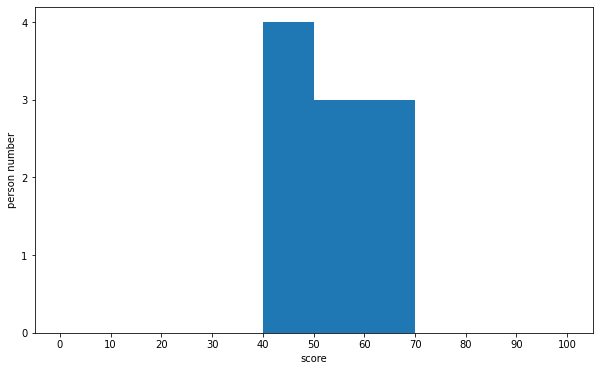

In [58]:
# ÌûàÏä§ÌÜ†Í∑∏Îû® (Histogram) ÌëúÌòÑ Î∞©Î≤ï

# Ï∫îÎ≤ÑÏä§ ÏÉùÏÑ± ( Í∞ÄÎ°ú X ÏÑ∏Î°ú ÏÇ¨Ïù¥Ï¶à Ìè¨Ìï® )
fig = plt.figure(figsize=(10,6))
# Ï∫îÎ≤ÑÏä§ ÏúÑÏóê Í∑∏Î¶¥ ÏòÅÏó≠ ÏßÄÏ†ï (nrows, ncols, index)
ax = fig.add_subplot(1, 1, 1)

# Í≥ÑÍ∏âÏàò 10ÏúºÎ°ú ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶º
freq, _, _ = ax.hist(df_score_a.values, bins=10, range=(0, 100))
# XÏ∂ï, YÏ∂ïÏóê Label ÏÑ§Ï†ï
ax.set_xlabel('score')
ax.set_ylabel('person number')
# XÏ∂ïÏùÑ 0, 10, 20, ..., 100 ÎààÍ∏àÏúºÎ°ú Íµ¨Î∂Ñ
# YÏ∂ïÏùÑ 0, 1, 2, ... ÎààÍ∏àÏúºÎ°ú Íµ¨Î∂Ñ
ax.set_xticks(np.linspace(0, 100, 10+1))
ax.set_yticks(np.arange(0, freq.max()+1))
# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.show()

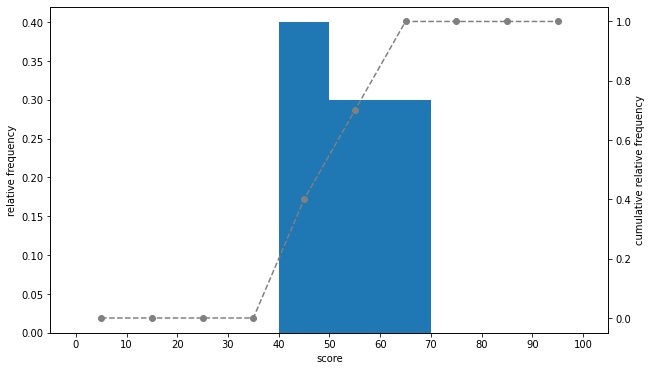

In [59]:
# ÏÉÅÎåÄÎèÑÏàòÏùò ÌûàÏä§ÌÜ†Í∑∏Îû® + ÎàÑÏ†Å ÏÉÅÎåÄÎèÑÏàò Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ ÌëúÌòÑ Î∞©Î≤ï

np.linspace(0, 100, 10+1)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1, 1, 1)
# YÏ∂ï Ïä§ÏºÄÏùºÏù¥ Îã§Î•∏ Í∑∏ÎûòÌîÑÎ•º ÎèôÏùºÌïú ÏòÅÏó≠Ïóê ÏÉùÏÑ±
ax2 = ax1.twinx()

# ÏÉÅÎåÄÎèÑÏàòÏùò ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶º
weights = np.ones_like(df_score_a) / len(df_score_a)
rel_freq, _, _ = ax1.hist(
    df_score_a.values, bins=10, range=(0, 100), weights=weights
)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+10))//2 for i in np.arange(0, 100, 10)]
# Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ Í∑∏Î¶º
# ls = '--'Îäî Ï†êÏÑ†ÏúºÎ°ú lineÏùÑ Í∑∏Î¶¨Îäî Í≤É
# marker = 'o'Îäî Îç∞Ïù¥ÌÑ∞ Ï†êÏùÑ Í∑∏Î¶¨Îäî Í≤É
# color = 'gray'Îäî ÌöåÏÉâÏúºÎ°ú ÏÑ†ÏùÑ Í∑∏Î¶¨Îäî Í≤É
ax2.plot(
    class_value, cum_rel_freq, 
    ls='--', marker='o', color='gray'
)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')

ax1.set_xticks(np.linspace(0, 100, 10+1))

# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.show()

- ÏÉÅÏûêÍ∑∏Î¶º (Box plot)
  - Îç∞Ïù¥ÌÑ∞Ïùò ÏÇ∞Ìè¨ÎèÑÎ•º ÌëúÌòÑÌïòÎäî Í∑∏Î¶º
  - Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨ÏôÄ Ïù¥ÏÉÅÍ∞íÏùÑ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌååÏïÖ
  - Q1, Q2, Q3, IQRÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶∞Îã§.
  - Î∞ïÏä§ Î∞îÍπ•Ïùò Í∞ÄÎ°úÏÑ†Îì§ÏùÄ Ïù¥ÏÉÅÍ∞íÏùÑ Î∂ÑÎ¶¨ÌïòÎäî Í∏∞Ï§ÄÏúºÎ°úÏÑú,  
ÏïÑÎûò Í≤ΩÍ≥ÑÎäî Q1 - Q1.5 X IQR, ÏúÑ Í≤ΩÍ≥ÑÎäî Q3 + 1.5 X IQR Ïù¥Îã§.
  - Í≤ΩÍ≥Ñ Î∞ñ Îç∞Ïù¥ÌÑ∞Îäî Ïù¥ÏÉÅÍ∞íÏúºÎ°ú Î≥¥Î©¥ ÎêúÎã§.

- ÏÉÅÏûêÍ∑∏Î¶º ÌëúÌòÑ Î∞©Î≤ï
  - Boxplot Î©îÏÑúÎìú ÏÇ¨Ïö©
  - Ìï¥ÏÑùÎ∞©Î≤ï 
    - 50Ï†ê Ï§ëÎ∞ò Ï†ÑÌõÑÏùò Ï†êÏàòÎ•º Î∞õÏùÄ ÌïôÏÉùÏù¥ ÎßéÎã§
    - ÏïΩ 70Ï†ê Î∞è 40Ï†êÏù¥ Ïù¥ÏÉÅÍ∞íÏùÑ ÎÇòÎàÑÎäî Í∏∞Ï§ÄÏûÑÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§

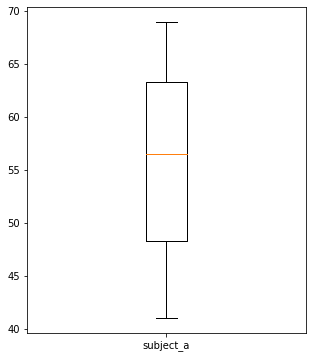

In [60]:
np.arange(0, 100, 10)

i = 0
(i+(i+10))//2

fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(df_score_a.values, labels=['subject_a'])

plt.show()